# TASK - 5 Exploratory Data Analysis - Sport
# Level - Advaced. IPL Dataset
# Name : S. Jatin

# Objective :
## Perform EDA on ipl dataset. As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team. Suggest teams or players a company should endorse for its products.

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

## Loading Datasets

In [103]:
df1=pd.read_csv('deliveries.csv')
df2=pd.read_csv('matches.csv')

In [104]:
df1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [105]:
df2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


## Analysing the data of deliveries dataset

In [106]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
match_id            179078 non-null int64
inning              179078 non-null int64
batting_team        179078 non-null object
bowling_team        179078 non-null object
over                179078 non-null int64
ball                179078 non-null int64
batsman             179078 non-null object
non_striker         179078 non-null object
bowler              179078 non-null object
is_super_over       179078 non-null int64
wide_runs           179078 non-null int64
bye_runs            179078 non-null int64
legbye_runs         179078 non-null int64
noball_runs         179078 non-null int64
penalty_runs        179078 non-null int64
batsman_runs        179078 non-null int64
extra_runs          179078 non-null int64
total_runs          179078 non-null int64
player_dismissed    8834 non-null object
dismissal_kind      8834 non-null object
fielder             6448 non-null object
dtype

In [107]:
df1.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [108]:
df1.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [109]:
df1.shape

(179078, 21)

Out of 179078, more than 170000 are null values in the last 3 columns, so they can be dropped.

In [110]:
df1.drop(columns=['player_dismissed','fielder'],inplace=True)

In [111]:
df1['dismissal_kind']=df1['dismissal_kind'].fillna(0)
df1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,dismissal_kind
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,0
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,0


## Most runs scored by batsmen in IPL

In [112]:
batsmen_data = df1["batsman"].value_counts()[0:15].sort_values(ascending = False)
batsmen_data

V Kohli           4211
SK Raina          4044
RG Sharma         3816
S Dhawan          3776
G Gambhir         3524
RV Uthappa        3492
DA Warner         3398
MS Dhoni          3318
AM Rahane         3215
CH Gayle          3131
AB de Villiers    2977
KD Karthik        2890
AT Rayudu         2681
SR Watson         2639
PA Patel          2444
Name: batsman, dtype: int64

In [113]:
top7=df1["batsman"].value_counts()[0:7].sort_values(ascending = False)

## Plotting bar plot for top 7 run scorers

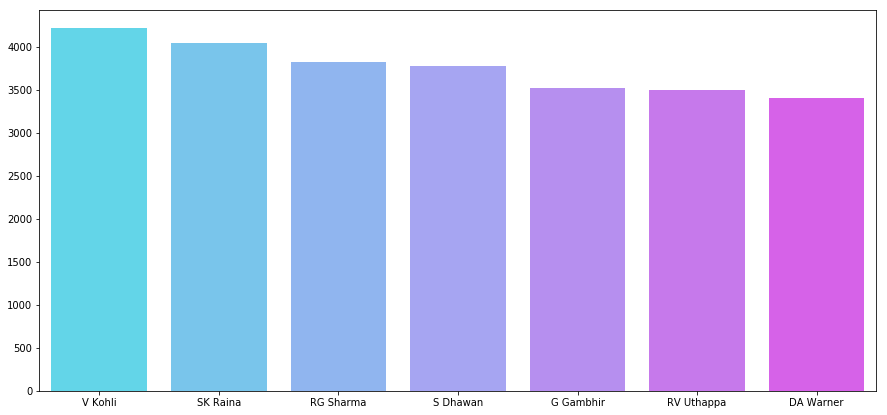

In [114]:
ax = plt.subplots(figsize = (15,7))
sns.barplot(top7.index, top7.values, alpha=0.8, palette = "cool")
plt.show()

## Most Wicket Takers in IPL

In [115]:
bowlers = df1[['bowler','dismissal_kind']]

In [116]:
bowlers = bowlers[(bowlers.dismissal_kind.isin(['caught', 'bowled', 'lbw', 'caught and bowled', 'stumped']))]
bowlers = bowlers.groupby('bowler').count().reset_index()
bowlers.rename(columns={'dismissal_kind':'no_wickets'}, inplace=True)
bowlers = bowlers.sort_values(by='no_wickets', ascending=False)
bowlers[0:8]
bowlers.head()

,bowler,no_wickets
290,SL Malinga,170
6,A Mishra,156
110,Harbhajan Singh,149
227,PP Chawla,149
82,DJ Bravo,147


# Plotting bar graph for top 5 wicket takers

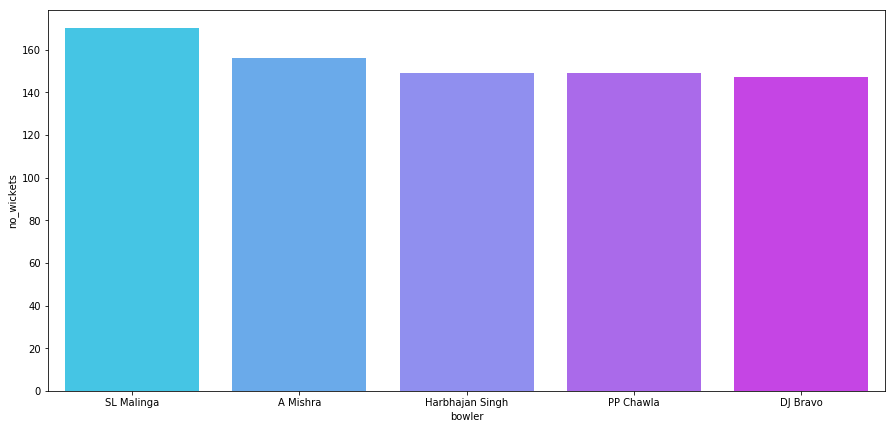

In [117]:
a = plt.subplots(figsize = (15,7))
sns.barplot( bowlers["bowler"].head(), bowlers["no_wickets"], data = bowlers, palette = "cool")

# Analysing the data of matches dataset

In [118]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               749 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             752 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(5), object(13)
memory usage: 106.4+ KB


In [119]:
df2.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [120]:
df2.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [126]:
df2.dropna(subset=['winner'], how='all', inplace=True)
df2.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      0
venue                0
umpire1              2
umpire2              2
umpire3            634
dtype: int64

In [127]:
df2.shape

(752, 18)

## Total no of seasons in dataset

In [128]:
len(df2.season.unique())

12

## Most Frequent Umpire

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text yticklabel objects>)

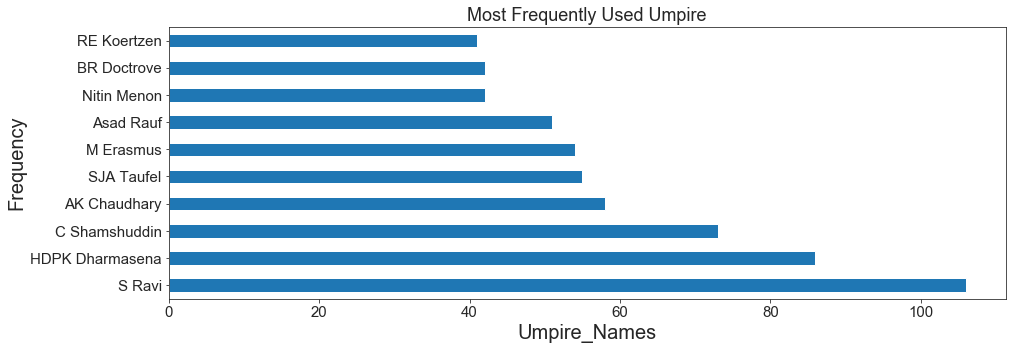

In [162]:
umpires = pd.concat([df2.umpire1,df2.umpire2], ignore_index=True)
umpires = pd.DataFrame(umpires, columns = ['umpire_name'])

umpires['umpire_name'].value_counts().head(10).plot(kind = 'barh', figsize = (15,5))
plt.title("Most Frequently Used Umpire",fontsize=18)
plt.ylabel("Frequency", size = 20)
plt.xlabel("Umpire_Names", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

S Ravi is the most used umpire according the above datasets

## Most used Stadium

In [163]:
df2["venue"].value_counts()[0:10]

Eden Gardens                                  77
Wankhede Stadium                              73
M Chinnaswamy Stadium                         71
Feroz Shah Kotla                              66
Rajiv Gandhi International Stadium, Uppal     56
MA Chidambaram Stadium, Chepauk               49
Sawai Mansingh Stadium                        47
Punjab Cricket Association Stadium, Mohali    35
Maharashtra Cricket Association Stadium       21
Dr DY Patil Sports Academy                    17
Name: venue, dtype: int64

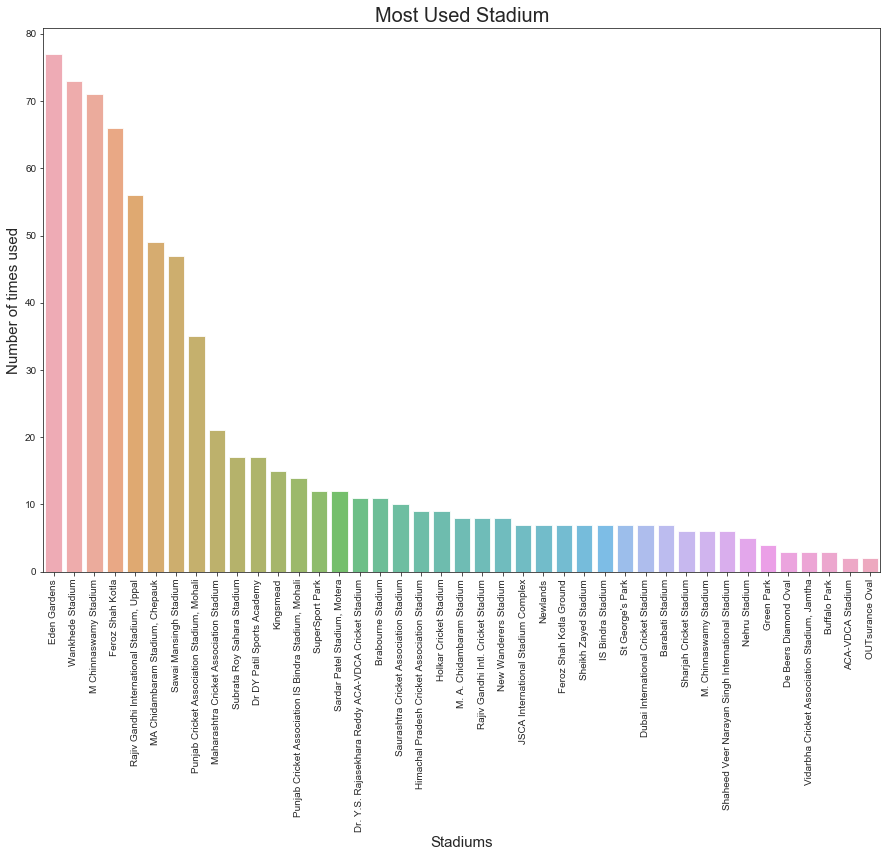

In [165]:
import seaborn as sns
stadium = df2["venue"].value_counts().sort_values(ascending = False)
ax = plt.subplots(figsize = (15,10))
stad_var = sns.barplot(stadium.index, stadium.values, alpha = 0.8)
plt.title("Most Used Stadium", fontsize = 20)
plt.xlabel("Stadiums", fontsize = 15)
plt.ylabel("Number of times used", fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

The most used staium is Eden gardens

## The most successful team is the team with high winning percentage or a team with most wins

In [130]:
team_df = df2[['team1','team2', 'toss_winner','toss_decision','winner']]
team_df.head()

,team1,team2,toss_winner,toss_decision,winner
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,Rising Pune Supergiant
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,Royal Challengers Bangalore


In [133]:
teams = df2.team1.unique()
win_percent = []
for each_team in teams:
    team_vs = np.count_nonzero(df2['team1'].astype(str).str.contains(each_team)) + np.count_nonzero(df2['team2'].astype(str).str.contains(each_team))
    team_won = np.count_nonzero(df2['winner'].astype(str).str.contains(each_team))   
    win_percent.append(100 * (team_won / team_vs))

In [135]:
won_df = pd.DataFrame({'Team': teams, 'Win Percantge': win_percent})
won_df

,Team,Win Percantge
0,Sunrisers Hyderabad,53.703704
1,Mumbai Indians,58.288770
2,Gujarat Lions,43.333333
3,Rising Pune Supergiant,50.000000
4,Royal Challengers Bangalore,47.457627
5,Kolkata Knight Riders,51.685393
6,Delhi Daredevils,42.138365
7,Kings XI Punjab,46.590909
8,Chennai Super Kings,60.975610
9,Rajasthan Royals,51.724138


## Plotting the winning percentage visually

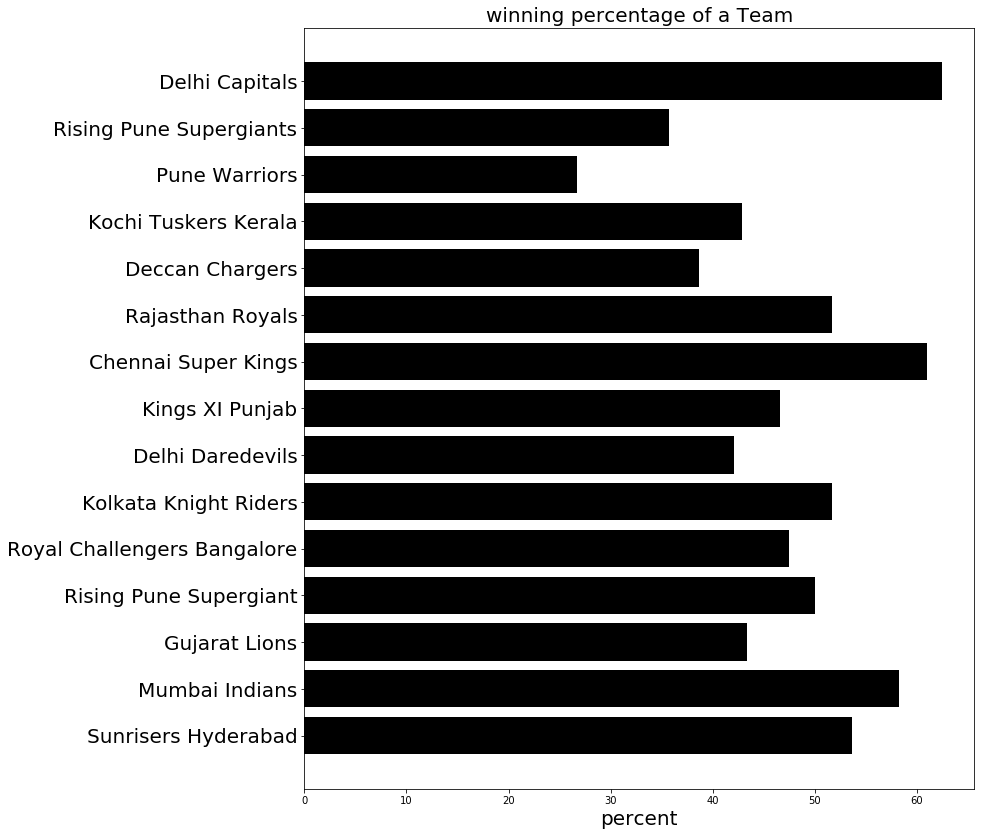

In [138]:
ind = np.arange(won_df.shape[0])
width = 0.8
fig, ax = plt.subplots(figsize=(12,14))
rects = ax.barh(ind, win_percent, color='black', align='center')
ax.set_yticks(ind)
ax.set_yticklabels(won_df.Team.values, rotation='horizontal', fontsize=20)
ax.set_xlabel("percent", fontsize=20)
ax.set_title("winning percentage of a Team", fontsize=20)
plt.show()

In [136]:
df2.winner.value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

## Plotting the winner by no. of matches they won

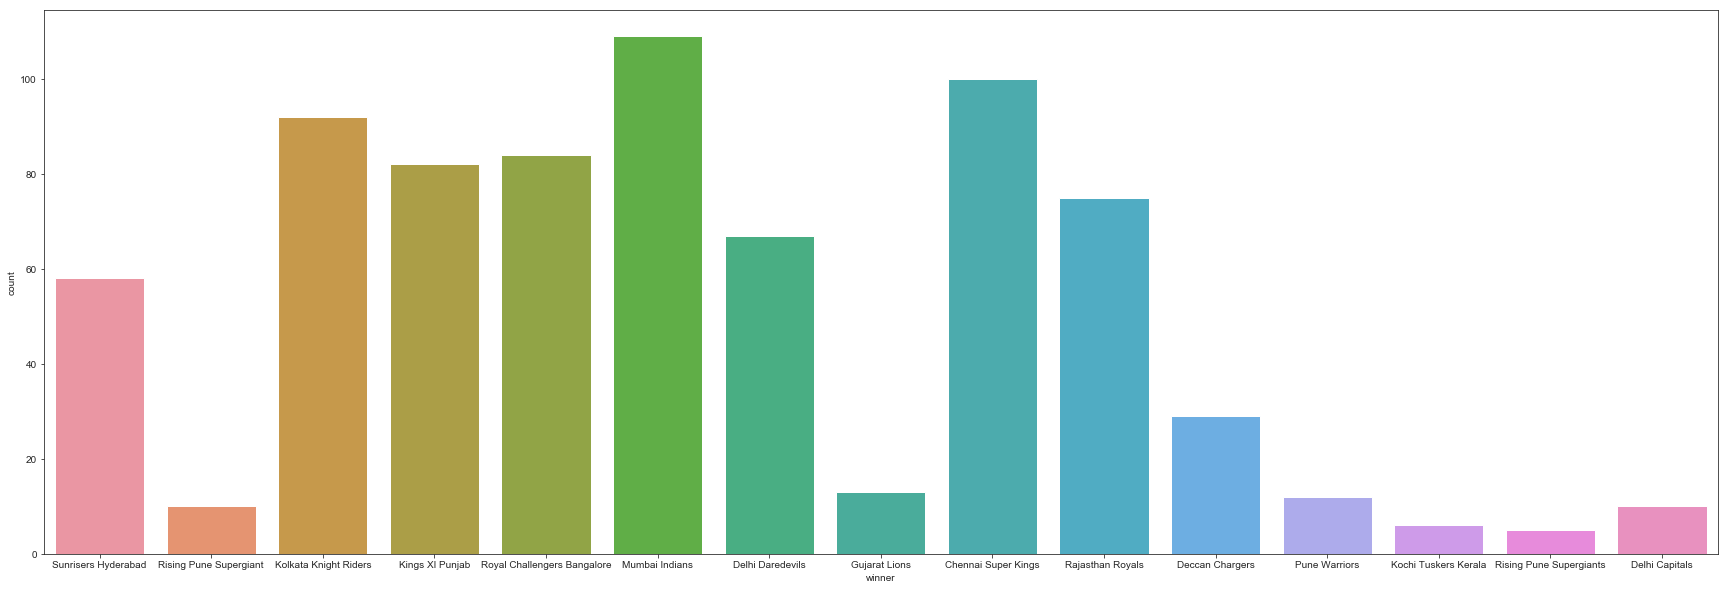

In [142]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
sns.countplot(x="winner", data=team_df)

### According to the win % delhi capitals has the highest % but as per this dataset, it played very less matches.
### According to the no. of matches won, mumbai is the highest. But there is a very small difference between CSK and MI as the CSK's winning % is higher than MI's winning %.
## So these both teams can be considered as the most successful teams according to this dataset.

## Role of Toss in winning the matches

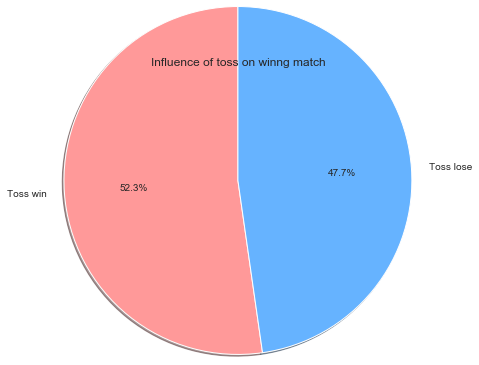

In [151]:
df_toss = df2[['toss_winner', 'winner']]
toss_win = df_toss[df_toss.toss_winner == df_toss.winner].count()[0]
toss_lose = df_toss[df_toss.toss_winner != df_toss.winner].count()[0]
y = [toss_win, toss_lose]
#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(y, labels = ["Toss win", "Toss lose"], autopct = '%1.1f%%', radius=2, colors=colors, shadow = True, startangle=90)
plt.title("Influence of toss on winng match")
plt.show()

AS there is no big difference in the winning % with Toss winning %, Toss doesn't have any impact on match's result

## Most Consistent Batsmen

In [153]:
mixed = pd.merge(df1,df2, left_on='match_id', right_on ='id')

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 8 Text yticklabel objects>)

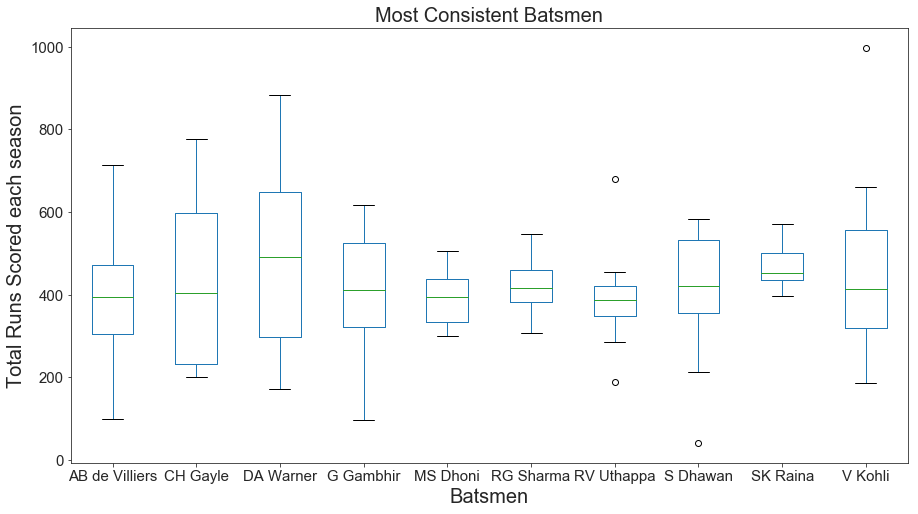

In [154]:
consistency = mixed[mixed.batsman.isin([ 'V Kohli','SK Raina','RG Sharma','G Gambhir',
                                            'RV Uthappa', 'S Dhawan','CH Gayle', 'MS Dhoni',
                                            'DA Warner', 'AB de Villiers'])][['batsman','season','total_runs']]

consistency.groupby(['season','batsman'])['total_runs'].sum().unstack().plot(kind = 'box', figsize = (15,8))
plt.title("Most Consistent Batsmen", fontsize = 20)
plt.xlabel("Batsmen", size = 20)
plt.ylabel("Total Runs Scored each season", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

## Batsmen with Highest Average

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 <a list of 9 Text yticklabel objects>)

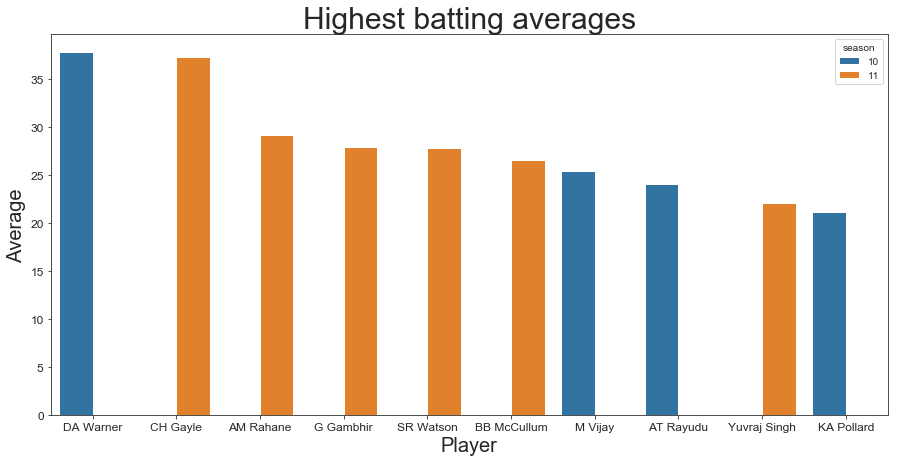

In [155]:
total_matches = pd.DataFrame(mixed.groupby('batsman')['match_id'].nunique()) #total number of matches played by each batsman
runs = pd.DataFrame(mixed.groupby('batsman')['batsman_runs'].sum()) #total runs of each batsman
seasons = pd.DataFrame(mixed.groupby('batsman')['season'].nunique()) #season = 1 implies played only 1 season

batsman_data = pd.DataFrame({'match':total_matches['match_id'],'run':runs['batsman_runs'],'season':seasons['season']})
batsman_data.reset_index(inplace = True)

batsman_data['batting_average'] = batsman_data['run']/batsman_data['match']
high_avg = batsman_data[batsman_data['season'].isin([10,11])][['season','batsman','batting_average']].sort_values(by = 'batting_average',ascending = False).head(10)
plt.figure(figsize = (15,7))
sns.barplot(x='batsman', y='batting_average', data = high_avg, hue = 'season')
plt.title("Highest batting averages",fontsize= 30)
plt.xlabel("Player", size = 20)
plt.ylabel("Average", size = 20)
plt.xticks(size = 12)
plt.yticks(size = 12)

## Most Economical bowlers

In [158]:
runs_given = pd.DataFrame(mixed.groupby('bowler')['batsman_runs'].sum())
balls_bowled = pd.DataFrame(mixed.groupby('bowler')['ball'].count())
overs_bowled = balls_bowled['ball']/6
wickets_taken = pd.DataFrame(mixed[mixed['dismissal_kind'] != 'no dismissal'].groupby('bowler')['dismissal_kind'].count())
seasons_played = pd.DataFrame(mixed.groupby('bowler')['season'].nunique())
bowler_economy_rate = pd.DataFrame({'runs':runs_given['batsman_runs'],'balls':balls_bowled['ball'],'wickets':wickets_taken['dismissal_kind'],
                          'season':seasons_played['season'],'overs':overs_bowled})
bowler_economy_rate.reset_index(inplace = True)
bowler_economy_rate['economy_rate'] = bowler_economy_rate['runs']/bowler_economy_rate['overs']
x=best_economy_rate = bowler_economy_rate[bowler_economy_rate.season >= 5].sort_values(by = 'economy_rate', ascending = True)
best_economy_rate.head(10).style.apply(lambda x: ['background: lightgreen' if x.name in [106,315,253]else '' for i in x], axis=1)
x.head(10)

,bowler,runs,balls,wickets,season,overs,economy_rate
108,DW Steyn,2283,2207,2207,10,367.833333,6.206615
207,M Muralitharan,1642,1581,1581,7,263.500000,6.231499
291,RN ten Doeschate,88,83,83,5,13.833333,6.361446
286,RE van der Merwe,486,455,455,5,75.833333,6.408791
269,R Ashwin,3224,3016,3016,10,502.666667,6.413793
340,SL Malinga,3218,2974,2974,9,495.666667,6.492266
347,SP Narine,2825,2600,2600,8,433.333333,6.519231
138,J Botha,781,709,709,5,118.166667,6.609309
101,DL Vettori,870,785,785,5,130.833333,6.649682
126,Harbhajan Singh,3880,3451,3451,12,575.166667,6.745871


Text(0.5, 1.0, 'Most Economical Bowlers')

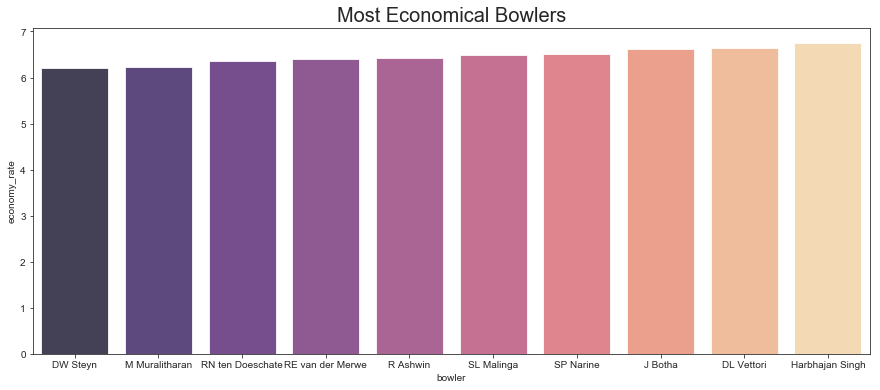

In [160]:
ax = plt.subplots(figsize = (15, 6))
sns.barplot(x["bowler"].head(10),x["economy_rate"] , alpha = 0.8, palette = "magma")
plt.title("Most Economical Bowlers", size = 20)

# Finding the players with most no. of MOM's(Man Of the Match)

In [145]:
mom_df = df2[['team1','team2','toss_winner','toss_decision','winner','win_by_runs','win_by_wickets','player_of_match']]
mom_df.head()

,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,player_of_match
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,35,0,Yuvraj Singh
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,Rising Pune Supergiant,0,7,SPD Smith
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,0,10,CA Lynn
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,0,6,GJ Maxwell
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,15,0,KM Jadhav


In [148]:
top_bat = df2['player_of_match'].value_counts().reset_index()
top_bat.columns = ['player_name', 'times_player_of_the_match']
top_bat = top_bat.loc[top_bat['times_player_of_the_match']>8]
top_bat = top_bat.sort_values(by='times_player_of_the_match')
top_bat

,player_name,times_player_of_the_match
20,SP Narine,9
18,SE Marsh,9
19,AT Rayudu,9
17,JH Kallis,10
16,KA Pollard,10
15,DR Smith,11
14,A Mishra,11
13,V Sehwag,11
12,AD Russell,11
11,AM Rahane,12


## Plotting the players with highest MOM awards

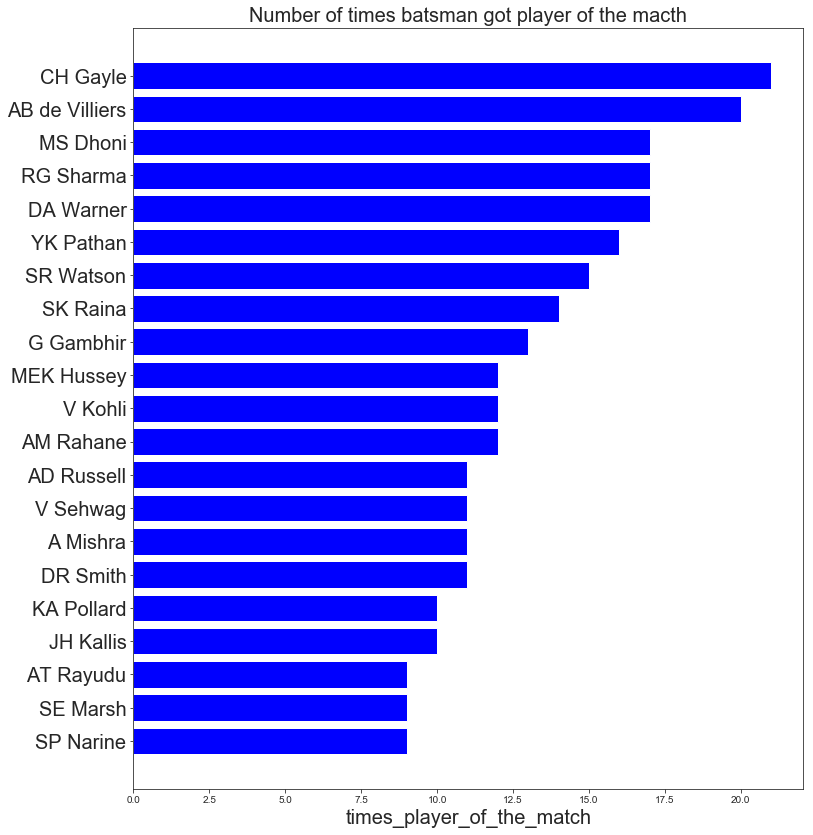

In [150]:
ind = np.arange(top_bat.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,14))
rects = ax.barh(ind, top_bat.times_player_of_the_match.values, color='b')
ax.set_yticks(ind)
ax.set_yticklabels(top_bat.player_name.values, rotation='horizontal', fontsize=20)
ax.set_xlabel("times_player_of_the_match", fontsize=20)
ax.set_title("Number of times batsman got player of the macth", fontsize=20)
plt.show()

### According to MOM awards,most runs,consistency,economy and most wickets, the top 7 most successful players are:
1.   CH Gayle
1.   Ab Devilliers
2.   MS Dhoni
1.   RG Sharma
1.   DA Warner 
1.   V Kohli
2.   DW Steyn 

**A company should endorse above Top Players, CSK & MI teams for its products.**

# Final Conclusions:

###  *Mumbai Indians & Chennai Super Kings are the most successful teams in IPL till now.
###  *Christopher Gayle has been most awarded "Man of the Match"
###  *Virat Kohli has scored most runs in IPL
###  *L Malinga has taken most wickets
###  *Suresh Raina has been Most Consistent Batsman.
###  *DA Warner has the most highest Average 
###  *Dale Steyn has the best economy in IPL
###  *S Ravi is the most used umpire
###  *Eden Garden is the most used stadium
###  *In list of most runs scorers, only MS Dhoni & AB De Villers are not opening batsman.
###  *CSK is the only team, who opts to bat first mostly

# THANK YOU